### Скоринговая модель, оценивающая вероятность дефолта клиента на стадии заведения кредитной заявки

### 20 вариант

# Данный большой блок не нужно запускать (все упадет, ибо все почитано после в коде), тут просто ответы. Далее блок с кодом, который работает и запускается последовательно.

## 1. Какая доля 1 в выборке "accept"? 
   `0.021411`

## 2. Необходимо рассчитать для всех интервальных переменных следующее:
  - Доля пропущенных значений 
  - Медиана
  - Среднее
  - Среднеквадратическое отклонение
  - Есть ли аномальные значения, выбросы? 
  - Information Value

Рассмотрим статистику для accept выборки

In [351]:
#Чтобы данная клетка заработала нужно запустить код, который идет после ответов
accept_stats

,income,age,experience,count_mnth_act_passport,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,CNT_MNTH_FROM_LAST_PMNT
Доля пропущенных значений,0.020059,0.000000,0.001597,0.000000,0.256098,0.281194,0.281194,0.310069
Медиана,41576.000000,34.761213,3.227397,7.743169,0.000000,0.000000,0.000000,0.925482
Среднее,61549.858374,36.480220,4.891766,7.225088,0.670645,0.360427,0.427094,19.073305
Среднеквадратическое отклонение,103602.754773,8.228790,5.301986,3.348552,0.835817,0.610469,0.690228,134.960214


Рассмотрим статистику для reject выборки

In [353]:
reject_stats

,income,age,experience,count_mnth_act_passport,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,CNT_MNTH_FROM_LAST_PMNT
Доля пропущенных значений,0.051061,0.000000,0.000748,0.000000,0.412232,0.430562,0.430562,0.511269
Медиана,29115.000000,24.109290,1.225735,3.713115,0.000000,0.000000,0.000000,0.864539
Среднее,33651.242633,24.037108,1.660079,3.509274,0.540971,0.340614,0.414025,42.478167
Среднеквадратическое отклонение,21821.837966,0.738261,1.394135,1.154384,0.730867,0.619647,0.708179,228.831924


Рассмотрим анамольные значения дял выборки accept (**чуть дальше в коде, очень много графиков, где все подробно описано**)

In [711]:
accept_df[accept_df['income'] > 1000000]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
1647,0,OTHER,elementary,VIP,1784679.0,0.0,1,0.0,NaN,30.554285,3.006340,0.0,0.0,10.052916,7532
4393,0,OTHER,elementary,VIP,1260432.0,0.0,1,1.0,0.851165,42.285762,0.497268,2.0,2.0,9.850146,19517
4394,0,OTHER,elementary,VIP,1260432.0,0.0,1,1.0,0.851165,42.285762,0.497268,2.0,2.0,9.850146,19518
7925,0,2NDFL,elementary,NaN,11450378.0,0.0,0,NaN,NaN,39.583562,1.408219,NaN,NaN,7.947945,35026
8043,0,2NDFL,elementary,NaN,2000095.0,0.0,0,1.0,0.500627,27.397260,2.594521,0.0,0.0,7.139726,35533
9250,0,OTHER,elementary,VIP,1371146.0,0.0,1,1.0,0.307975,39.653005,2.736807,0.0,0.0,0.186122,40673
10187,0,2NDFL,elementary,VIP,1572016.0,0.0,0,1.0,0.991465,41.713100,10.556935,0.0,0.0,8.811730,44977
12511,0,2NDFL,elementary,VIP,1543704.0,0.0,0,0.0,0.379772,33.856030,1.302605,0.0,0.0,10.025893,55065
21604,0,OTHER,elementary,NaN,1160000.0,0.0,0,0.0,1.951165,52.079452,4.161644,1.0,1.0,6.868493,94836
24492,0,OTHER,elementary,VIP,8000000.0,0.0,0,NaN,NaN,51.884932,8.416274,NaN,NaN,6.852055,107908


Это яркие выбросы, которые нам сильно мешают. Но все возможно в жизни. Для таких клиентов я бы построил отдельную модель

In [355]:
accept_df[accept_df['experience'] > 45]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport
6074,0,OTHER,beginner,Corporate,173000.0,0.0,0,NaN,NaN,34.536986,101.192365,NaN,NaN,9.750685
22062,0,OTHER,advanced,NaN,18000.0,0.0,0,1.0,1.0,26.302216,100.355191,0.0,0.0,6.261120


Возраст меньше, чем опыт работы) Опыт работы вряд ли может быть больше 100 лет:)

In [356]:
accept_df[accept_df['CNT_MNTH_FROM_LAST_PMNT'] > 480]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport
6,0,OTHER,elementary,Corporate,39713.0,0.0,1,0.0,1362.504682,25.326611,0.848469,1.0,1.0,5.214589
258,0,OTHER,advanced,Corporate,44607.0,0.0,1,0.0,1362.508132,34.813699,0.495890,1.0,1.0,6.021918
858,0,OTHER,elementary,NaN,31900.0,0.0,0,0.0,1355.633468,38.441178,2.882274,0.0,1.0,9.893233
963,0,OTHER,elementary,Corporate,20000.0,0.0,1,0.0,1352.151994,25.946081,0.595628,NaN,NaN,4.869369
1009,0,OTHER,elementary,Corporate,73950.0,0.0,1,0.0,1364.856564,26.345205,0.342466,1.0,1.0,6.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,0,OTHER,elementary,Corporate,49186.0,0.0,1,0.0,1348.496393,28.779796,1.040070,NaN,NaN,5.297605
31737,0,OTHER,advanced,Corporate,18339.0,0.0,1,0.0,1346.434162,48.783008,3.286885,0.0,0.0,3.699454
31837,0,2NDFL,advanced,NaN,11048.0,0.0,0,0.0,1348.856631,37.642728,1.081084,4.0,5.0,9.935878
31880,1,2NDFL,elementary,NaN,47601.0,0.0,0,0.0,1345.149686,41.010689,7.896175,3.0,5.0,2.238087


У нас максимальный возраст 60 лет. А люди в среднем могут взять кредит с 20 лет, поэтому все что больше 40 лет, а это 480 месяцев вряд ли возможно. Глянем на эти данные

In [362]:
accept_df.loc[accept_df['CNT_MNTH_FROM_LAST_PMNT'] < 0]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport,UID
212,0,OTHER,beginner,Corporate,50000.0,0.0,1,0.0,-0.816667,44.416438,2.967123,1.0,1.0,11.419178,1014
326,0,OTHER,elementary,NaN,107596.0,0.0,0,2.0,-0.141510,48.216438,5.365274,1.0,1.0,3.161644,1530
455,0,OTHER,elementary,Corporate,17934.0,0.0,0,1.0,-0.115099,26.956164,3.279452,1.0,1.0,6.898630,2182
544,0,OTHER,advanced,Corporate,62338.0,0.0,1,1.0,-0.139382,31.263014,3.857534,1.0,1.0,9.310630,2557
555,0,OTHER,elementary,NaN,60900.0,0.0,0,1.0,-0.139135,29.827397,0.443836,1.0,1.0,0.764181,2607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32492,1,OTHER,elementary,NaN,87000.0,0.0,0,0.0,-2.081586,33.863014,0.526027,1.0,1.0,9.843836,132039
32501,1,OTHER,advanced,Corporate,18000.0,0.0,0,1.0,-0.848746,37.338019,2.049315,1.0,1.0,11.090411,133228
32508,1,OTHER,advanced,NaN,30000.0,0.0,0,2.0,-0.201254,26.534247,1.094992,1.0,1.0,6.205479,134494
32511,1,OTHER,elementary,NaN,17000.0,0.0,0,3.0,-0.723947,27.243836,4.641096,1.0,1.0,4.054795,135116


Возможно отрицательные значения эти люди, которым одобрили кредити в других банках, либо бред и стоит удалить

### Обработка выбросов. Числовые заменяю на среднее. Категориальные на моду. Далее в коде все есть

### Information Value для выборки accept

In [367]:
print(tabulate(IVs_accept, tablefmt='grid'))

+------------------------------+------------+
| INCOME_TYPE                  | 0.0100185  |
+------------------------------+------------+
| EDUCATION_                   | 0.0548425  |
+------------------------------+------------+
| CUSTOMER_CATEGORY_           | 0.00542652 |
+------------------------------+------------+
| DEPENDANT_NUMBER             | 0.00162548 |
+------------------------------+------------+
| IS_EMPL                      | 0.784122   |
+------------------------------+------------+
| COUNT_ACTIVE_CREDIT_NO_CC    | 0.115      |
+------------------------------+------------+
| inquiry_14_day               | 0.15587    |
+------------------------------+------------+
| inquiry_21_day               | 0.19572    |
+------------------------------+------------+
| age_bins                     | 0.0242366  |
+------------------------------+------------+
| income_bins                  | 0.0632271  |
+------------------------------+------------+
| experience_bins              | 0

### Information Value для выборки accept и reject (разметил с помощью Reject Inference)

In [390]:
print(tabulate(IVs_mix, tablefmt='grid'))

+------------------------------+-----------+
| INCOME_TYPE                  | 0.0714077 |
+------------------------------+-----------+
| EDUCATION_                   | 0.0800306 |
+------------------------------+-----------+
| CUSTOMER_CATEGORY_           | 0.0702379 |
+------------------------------+-----------+
| DEPENDANT_NUMBER             | 0.0692435 |
+------------------------------+-----------+
| IS_EMPL                      | 0.16239   |
+------------------------------+-----------+
| COUNT_ACTIVE_CREDIT_NO_CC    | 0.151382  |
+------------------------------+-----------+
| inquiry_14_day               | 0.192133  |
+------------------------------+-----------+
| inquiry_21_day               | 0.191523  |
+------------------------------+-----------+
| age_bins                     | 0.0703198 |
+------------------------------+-----------+
| income_bins                  | 0.0802123 |
+------------------------------+-----------+
| experience_bins              | 0.0765823 |
+---------

## 3. Необходимо рассчитать для всех категориальных переменных следующее:
  - Мода
  - Доля пропущенных значений
  - Information Value
  - Есть ли выбросы, аномальные значений

In [505]:
accept_stats_info_categorical

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,0.0,0.000000
Доля пропущенных значений,0.0,0.0,0.5977760029489464,0.0,0.001321


In [506]:
reject_stats_info_categorical

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,1.0,0.000000
Доля пропущенных значений,0.0,0.0,0.4715234265407276,0.0,0.000468


IV Смотреть выше в общей табличке

Дальше в коде я нарисовал очень много гистгограмм и не нашел аномалий. Все возможно:)

## 4. Построить логистическую регрессию только на одобренных заявках с преобразованными переменными WoE. Какое значение GINI? F1 мера?

Далее в коде (снизу). Я поделил выборку accept на три части. Train, test, valid. На валидационной выборке считаем WoE.
Делаем преобразование на train и обоучаем на ней модель. И смотрим GINI, F1 на тесте

In [566]:
print("AUC-ROC на тествой выборке =",      
      round(roc_auc_score(y_test_accept, y_pred_accept), 2))
print("GINI на тестовой выборке =", 
      round(2 * roc_auc_score(y_test_accept, y_pred_accept) - 1, 2))
print("F1-Score на тестовой выборке", 
      round(f1_score(y_test_accept, y_pred_accept), 2))

AUC-ROC на тествой выборке = 0.64
GINI на тестовой выборке = 0.29
F1-Score на тестовой выборке 0.13


## 5. Провести анализ Reject Inference. Какая доля отказанных заявок?

Далее в коде(снизу). на уже обученной модели (До этого в 4-ом пункте) и посчитанyjq статистикой WoE я сделал аккуратное преобразование на reject (вставил костыль, чтобы увеличить некоторые интревалы, которых не было для reject). После сделал предсказание на реджект выборке и посчитал долю отказанных заявок на реджект выборке, она составила 


In [656]:
print("Доля отказанных заявок", y_pred_reject.mean())

Доля отказанных заявок 0.11867576919480034


## 6. Построить логистическую регрессию на всех заявках с преобразованными переменными WoE. Какое значение GINI, F1? Изменилась ли модель? 
Подобрый код снизу.

In [602]:
print("AUC-ROC на тествой выборке =",      
      round(roc_auc_score(y_test_accept, y_pred_mix), 2))
print("GINI на тестовой выборке =", 
      round(2 * roc_auc_score(y_test_accept, y_pred_mix) - 1, 2))
print("F1-Score на тестовой выборке", 
      round(f1_score(y_test_accept, y_pred_mix), 2))

AUC-ROC на тествой выборке = 0.65
GINI на тестовой выборке = 0.31
F1-Score на тестовой выборке 0.07


Gini - улучшился, f1 уменьшился

## 7. Какую модель вы рекомендуете для внедрения в продуктивную среду? Дать развернутое пояснение

Возможно из-за выборки получились далеко не самые лучшие показатели. Перевес классов. 
Преобразования, которые считались на валидацонной выборке именно на одобренных заявках не совсем корректно подходили для отказанных заявок. И самой информации не так много. Обе модели требуют серъезных доработок.
Я бы не порекомендовал никакую из этих моделей в продуктивную среду. Методы, использованные в данном случае сильно противоречит моим знаниями о классическо машинном обучение. Я понимаю, что данная модель не так сложно интерпритировать для бизнеса. Так как есть веса, есть логит, который хорошо описан и красиво переводиться на человеческий язык. Но как мы знаем, есть гораздо сильнее методы, которые хоть и не имеют такого явного описания и понимания, но они гораздо эффективнее. Так логистическая регрессия в большей степени ищет линейные преобразования, она не видит более сложные зависимости + мы оооочеееееень много теряем информации, когда делаем WoE преобразование, даже просто на категориальных признаках можно спокойно ванхотить и ни о чем не волноваться, другие кодировки используется, когда у нас гигантское кол-во классов, а тут их крайне мало. Кажется, что более традиционный подход может помочь, понимаю, что возникает сложности с доразметкой и так далее, но, к примеру, вместо обучение на accept выборке и предсказывания на reject,  я бы использовал кластеризацию с нужной нам метрикой и уже на основании класстеризации доразмечал бы reject выборку. Вместо WoE преобразования, я бы также бинаризовал числовые признаки и вместе с катериальными завонхотил бы и помимо этого вместо логистической регресси нагенерил бы еще признаков и запустил бы градиентный бустинг. Скорее всего на простых цифрах все было бы лучше. Не знаю насколько хорошо бы это работало в жизни. Попробую реализовать более интресные и сложные модели уже в проекте:)

# Теперь идут блоки с кодом. Можете запустить и проверить код :)

#### 0. Загружаем файлы и нужные библиотеки

In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import seaborn as sns
from tabulate import tabulate 
import warnings
warnings.filterwarnings('ignore')

In [710]:
accept_df = pd.read_csv('20_accept.csv')
reject_df = pd.read_csv('20_reject.csv')

#### 1.  Какая доля 1 в выборке "accept"?

Для начало проверим есть ли пропуски в `target`?

In [659]:
print("Все хорошо! Пропусков в таргете нет :)" if not accept_df.target.isna().sum() else "Есть пропуски")

Все хорошо! Пропусков в таргете нет :)


Проверим какие значения в таргете

In [660]:
accept_df.target.unique()

array([0, 1])

Отлично, значит если просто взять среднее по таргету это и будет нужная нам доля

In [661]:
accept_df.target.mean()

0.021410579345088162

####  2. Необходимо рассчитать для всех интервальных переменных следующее:
  - Доля пропущенных значений 
  - Медиана
  - Среднее
  - Среднеквадратическое отклонение
  - Есть ли аномальные значения, выбросы? 
  - Information Value

Вначале посмотрим на датафрейм и определим тип каждой колонки

In [662]:
accept_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32554 entries, 0 to 32553
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     32554 non-null  int64  
 1   INCOME_TYPE                32554 non-null  object 
 2   EDUCATION_                 32554 non-null  object 
 3   CUSTOMER_CATEGORY_         13094 non-null  object 
 4   income                     31901 non-null  float64
 5   DEPENDANT_NUMBER           32511 non-null  float64
 6   IS_EMPL                    32554 non-null  int64  
 7   COUNT_ACTIVE_CREDIT_NO_CC  24217 non-null  float64
 8   CNT_MNTH_FROM_LAST_PMNT    22460 non-null  float64
 9   age                        32554 non-null  float64
 10  experience                 32502 non-null  float64
 11  inquiry_14_day             23400 non-null  float64
 12  inquiry_21_day             23400 non-null  float64
 13  count_mnth_act_passport    32554 non-null  flo

UID - Бесполезная колонка. Только мешает и никакой связи с `target`. Удалим её

In [663]:
accept_df.drop(columns='UID', inplace=True)
reject_df.drop(columns='UID', inplace=True)

In [664]:
numerical = ['income', 'age', 'experience', 
             'count_mnth_act_passport',
             'COUNT_ACTIVE_CREDIT_NO_CC', 
             'inquiry_14_day', 'inquiry_21_day', 
            'CNT_MNTH_FROM_LAST_PMNT']

categorical = ['INCOME_TYPE', 'EDUCATION_', 'CUSTOMER_CATEGORY_', 
               'IS_EMPL', 'DEPENDANT_NUMBER']

Так как у нас два отдельных файлов, то логично написать функцию, которая создаст для нас красивый df с ответами
для числевых переменных

Но для начала исследуем функцию  `pd.describe`

In [665]:
accept_df[numerical].describe()

,income,age,experience,count_mnth_act_passport,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,CNT_MNTH_FROM_LAST_PMNT
count,3.190100e+04,32554.000000,32502.000000,32554.000000,24217.000000,23400.000000,23400.000000,22460.000000
mean,6.154986e+04,36.480220,4.891766,7.225088,0.670645,0.360427,0.427094,19.049060
std,1.036028e+05,8.228790,5.301986,3.348552,0.835817,0.610469,0.690228,134.965621
min,0.000000e+00,25.000741,-4.600000,-0.019126,0.000000,0.000000,0.000000,-66.559028
25%,2.700000e+04,29.530362,1.227014,4.960678,0.000000,0.000000,0.000000,0.529452
50%,4.157600e+04,34.761213,3.227397,7.743169,0.000000,0.000000,0.000000,0.925482
75%,7.000000e+04,42.367123,6.475850,9.906849,1.000000,1.000000,1.000000,3.501036
max,1.145038e+07,58.898817,101.192365,15.805479,8.000000,6.000000,8.000000,1365.276703


Отлично, половина ответов уже есть: \
'mean' - среднее, '50%' - медиана, std - 'Среднеквадратическое отклонение'. Остальное из этой таблички нам не нужно

In [666]:
def find_statistics_num(df, features):
    table = df[features].describe()

#   Возьмум нужное нам и переименуем для красоты
    table= table.loc[['50%', 'mean', 'std']]
    table.index = ['Медиана', 'Среднее', 'Среднеквадратическое отклонение']
    
#   Теперь посчитаем долю пропущенных значений. 
#   Просто проссуммируем np.nan и поделим на общее количество элементов
    p_missing_values = (df[numerical].isna().sum(axis=0) / df.shape[0])
    
#   Сделаем разные фокусы, чтобы красиво преобразовать p_missing_values 
#   в нужную нам строчку и совместим с нашей табличкой tmp    
    p_missing_values = pd.DataFrame(data=[p_missing_values], columns= p_missing_values.index)
    p_missing_values.index = ['Доля пропущенных значений']
    table = pd.concat([p_missing_values, table])
    return table

Посмотрим на даные 'accept.csv'

In [667]:
accept_stats = find_statistics_num(accept_df, numerical)
accept_stats

,income,age,experience,count_mnth_act_passport,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,CNT_MNTH_FROM_LAST_PMNT
Доля пропущенных значений,0.020059,0.000000,0.001597,0.000000,0.256098,0.281194,0.281194,0.310069
Медиана,41576.000000,34.761213,3.227397,7.743169,0.000000,0.000000,0.000000,0.925482
Среднее,61549.858374,36.480220,4.891766,7.225088,0.670645,0.360427,0.427094,19.049060
Среднеквадратическое отклонение,103602.754773,8.228790,5.301986,3.348552,0.835817,0.610469,0.690228,134.965621


Посмотрим на даные 'reject.csv'

In [668]:
reject_stats = find_statistics_num(reject_df, numerical)
reject_stats

,income,age,experience,count_mnth_act_passport,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,CNT_MNTH_FROM_LAST_PMNT
Доля пропущенных значений,0.051061,0.000000,0.000748,0.000000,0.412232,0.430562,0.430562,0.511269
Медиана,29115.000000,24.109290,1.225735,3.713115,0.000000,0.000000,0.000000,0.864539
Среднее,33651.242633,24.037108,1.660079,3.509274,0.540971,0.340614,0.414025,42.478167
Среднеквадратическое отклонение,21821.837966,0.738261,1.394135,1.154384,0.730867,0.619647,0.708179,228.831924


Посчитаем моду и долю пропущенных значений для категориальных значений

In [669]:
def stats_info_categorical(df, features):
    accept_stats_categorical = pd.DataFrame(columns=features, 
                                            index=['Мода', 'Доля пропущенных значений'])
    for feature in features:
        accept_stats_categorical[feature] = np.array(
        [df[feature].mode()[0], df[feature].isna().sum() / df[feature].shape[0]]
        )
    return accept_stats_categorical

In [670]:
accept_stats_info_categorical = stats_info_categorical(accept_df, categorical)
accept_stats_info_categorical

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,0.0,0.000000
Доля пропущенных значений,0.0,0.0,0.5977760029489464,0.0,0.001321


In [671]:
reject_stats_info_categorical = stats_info_categorical(reject_df, categorical)
reject_stats_info_categorical

,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,IS_EMPL,DEPENDANT_NUMBER
Мода,OTHER,elementary,Corporate,1.0,0.000000
Доля пропущенных значений,0.0,0.0,0.4715234265407276,0.0,0.000468


Так дальше мы будем заполнять значения

Теперь нам нужно найти аномальные значения, чтобы было проще построим гистограммы

In [672]:
def build_histplot(df, features):
    for feature in features:
        plt.figure(figsize=(18, 10))
        sns.histplot(df[feature])
        plt.show()

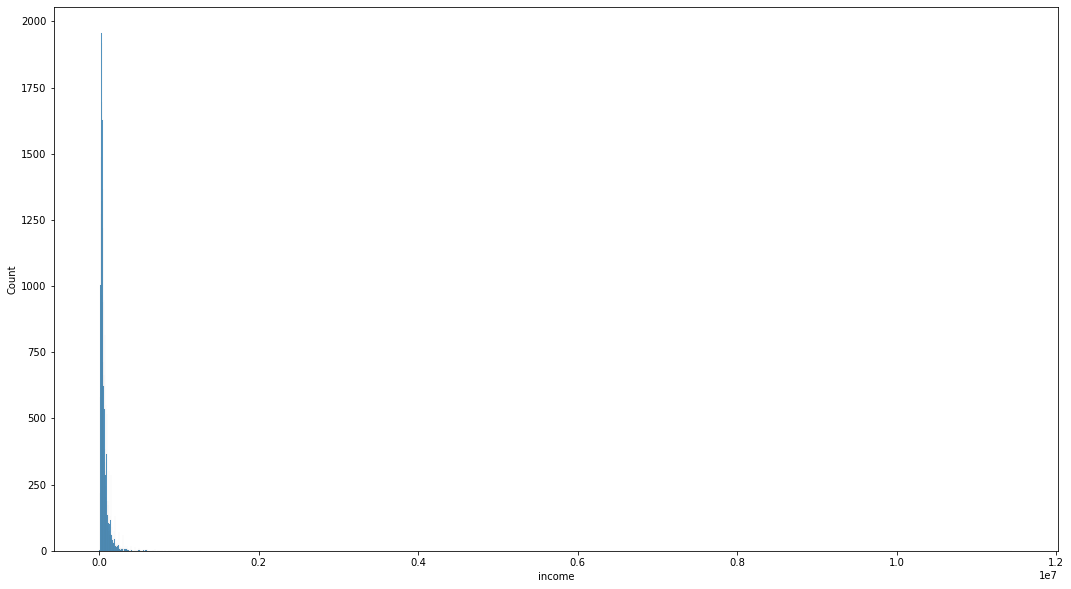

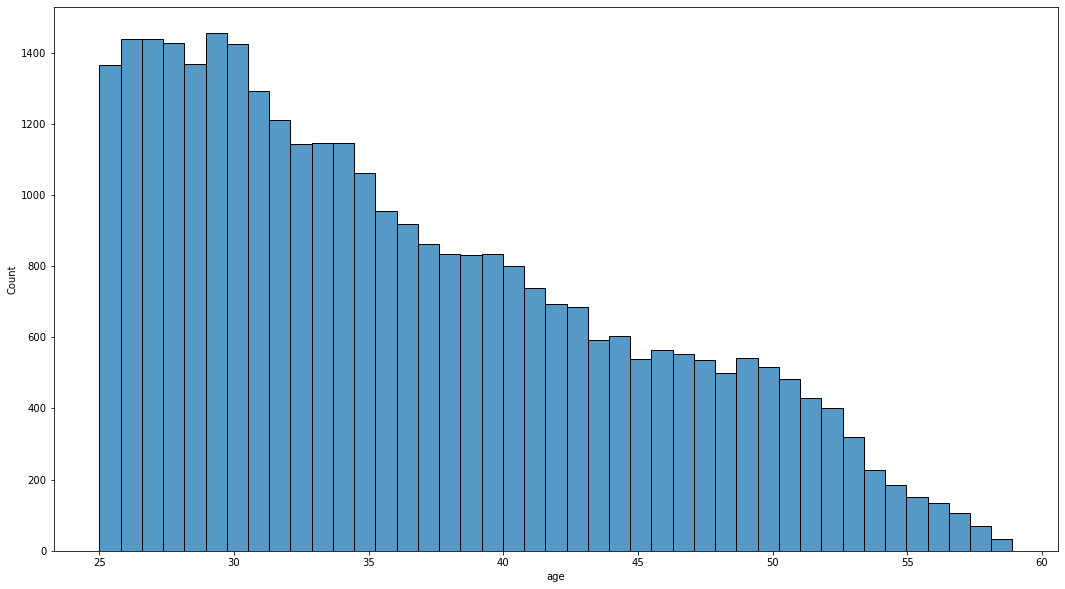

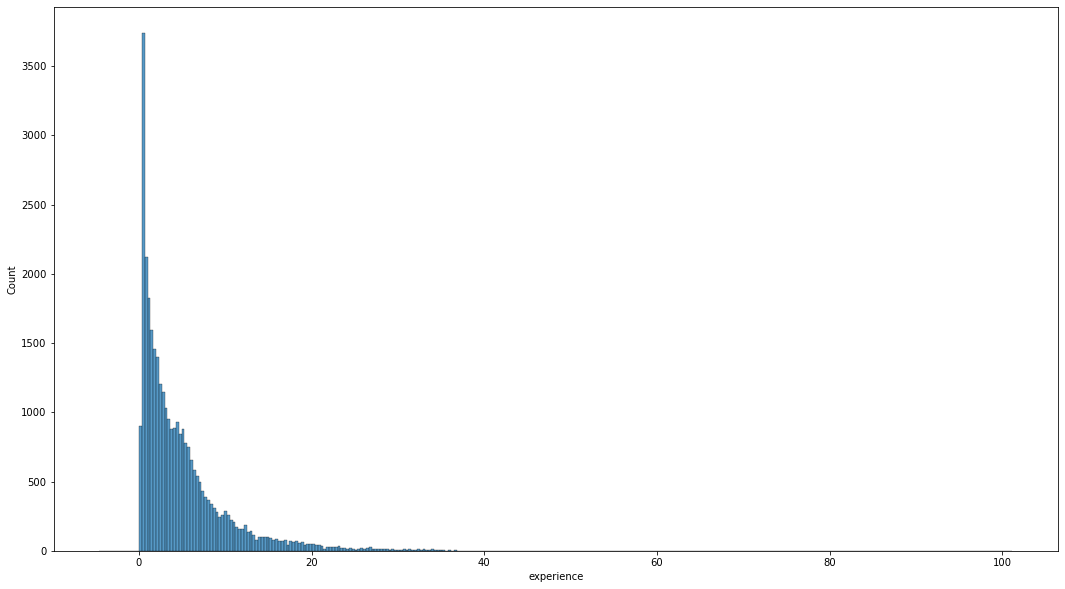

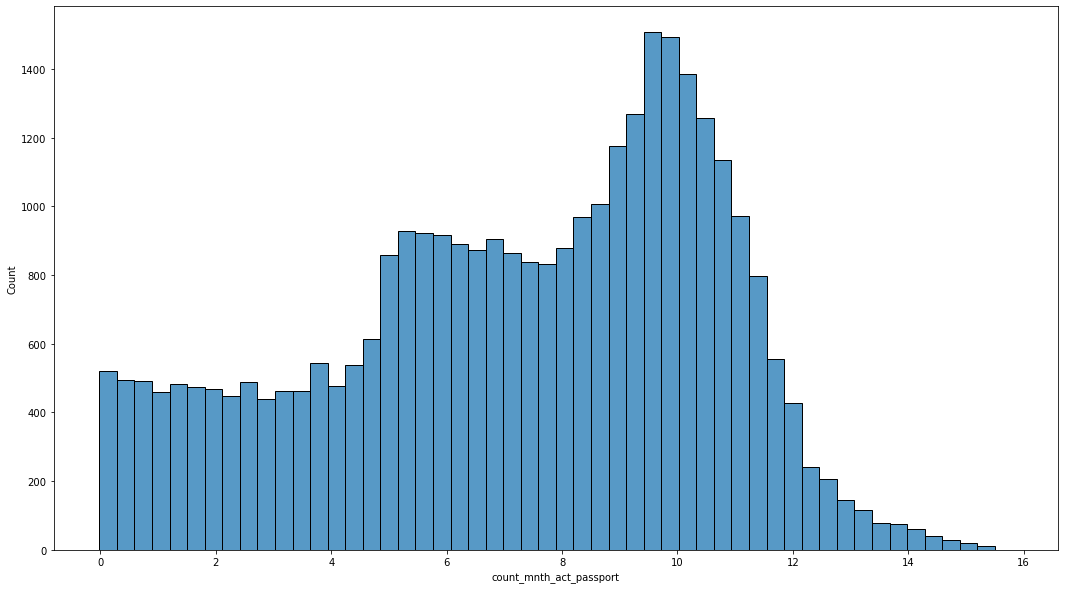

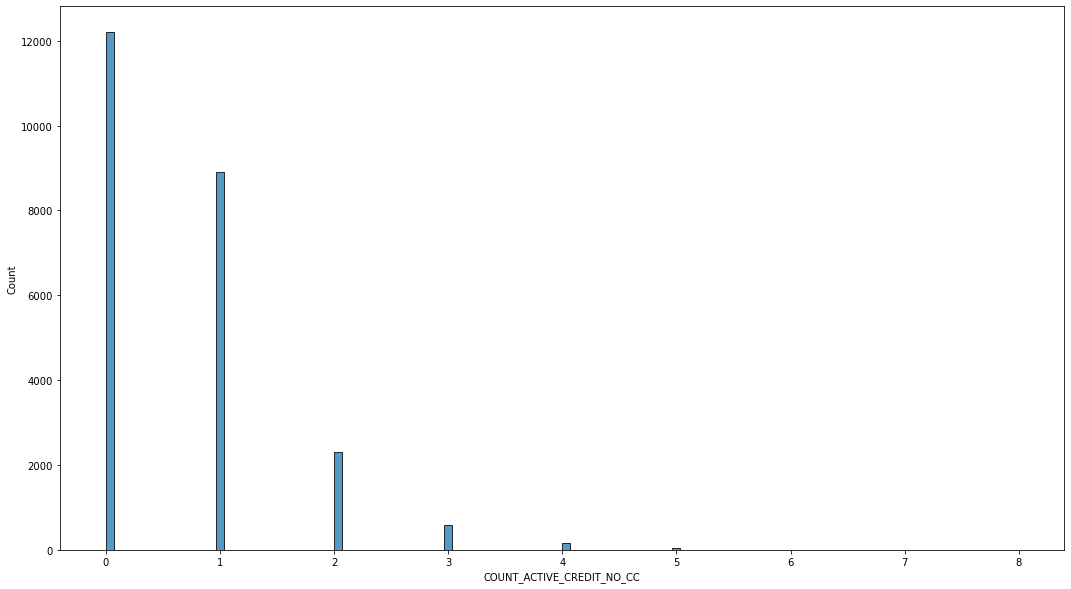

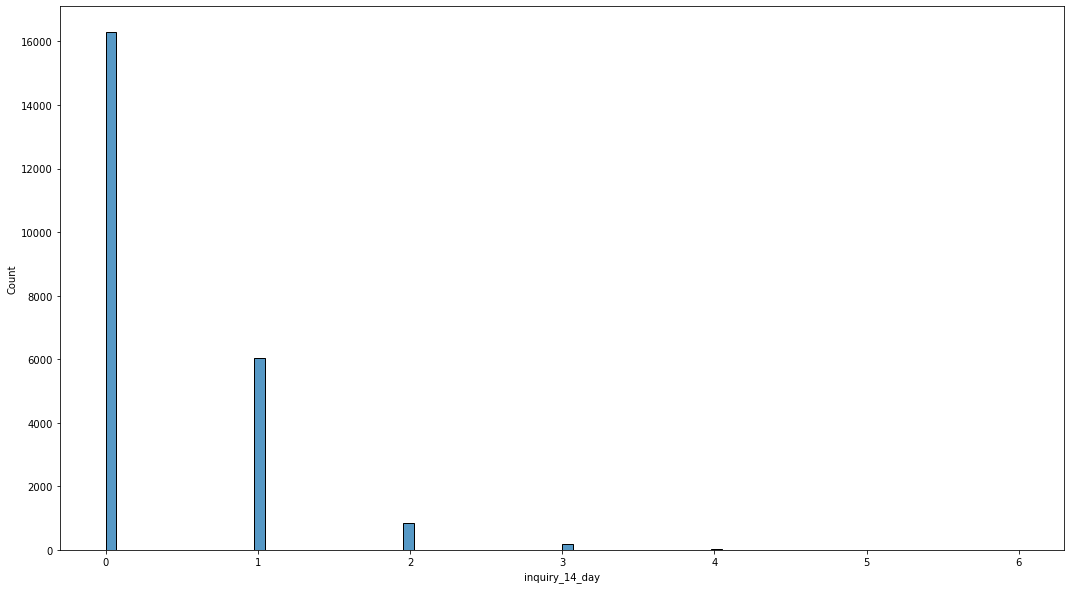

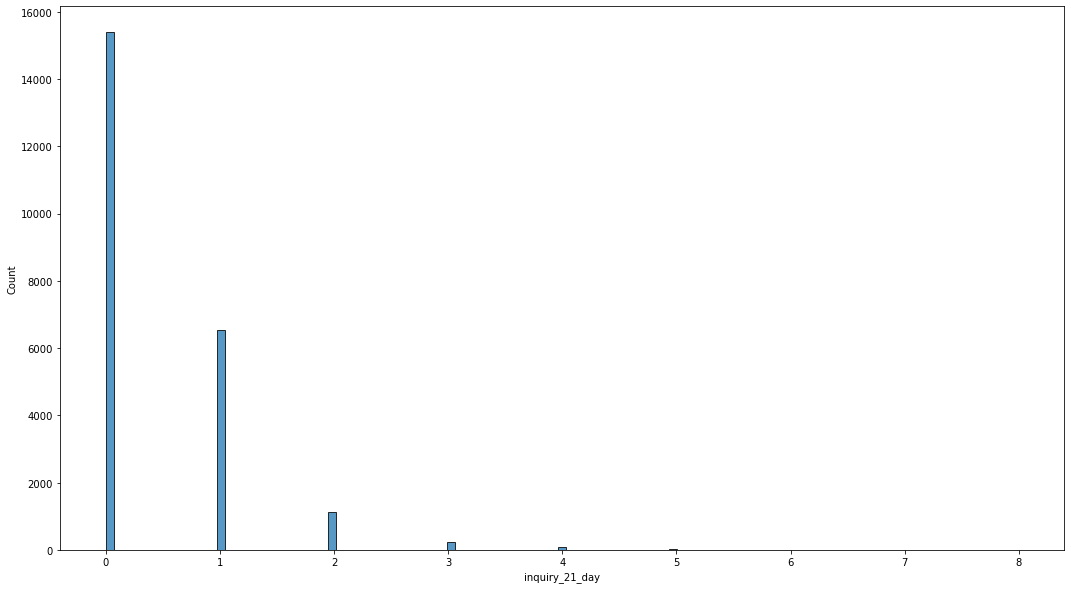

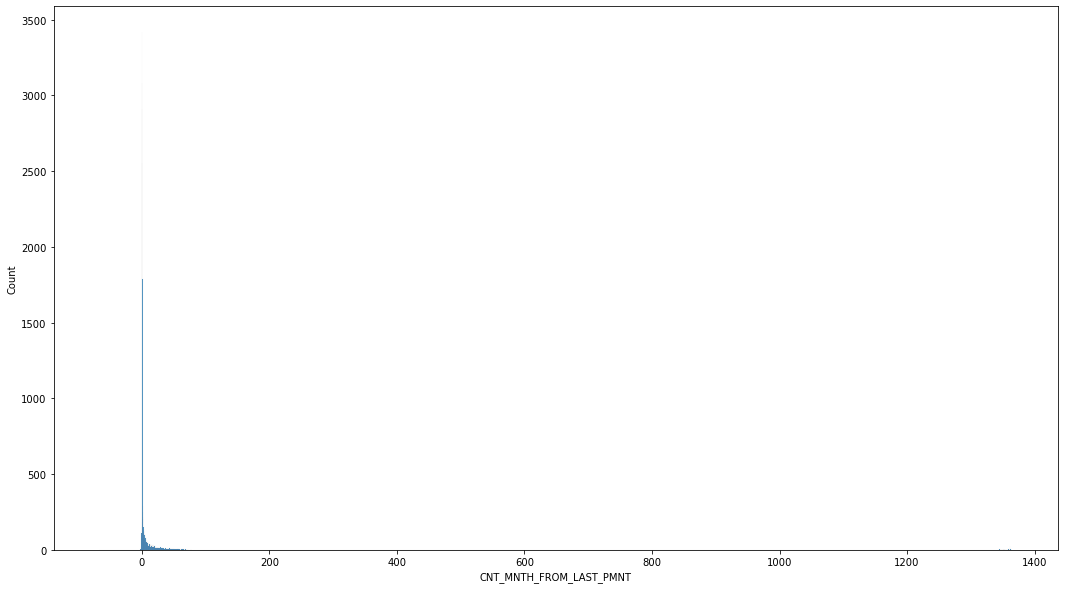

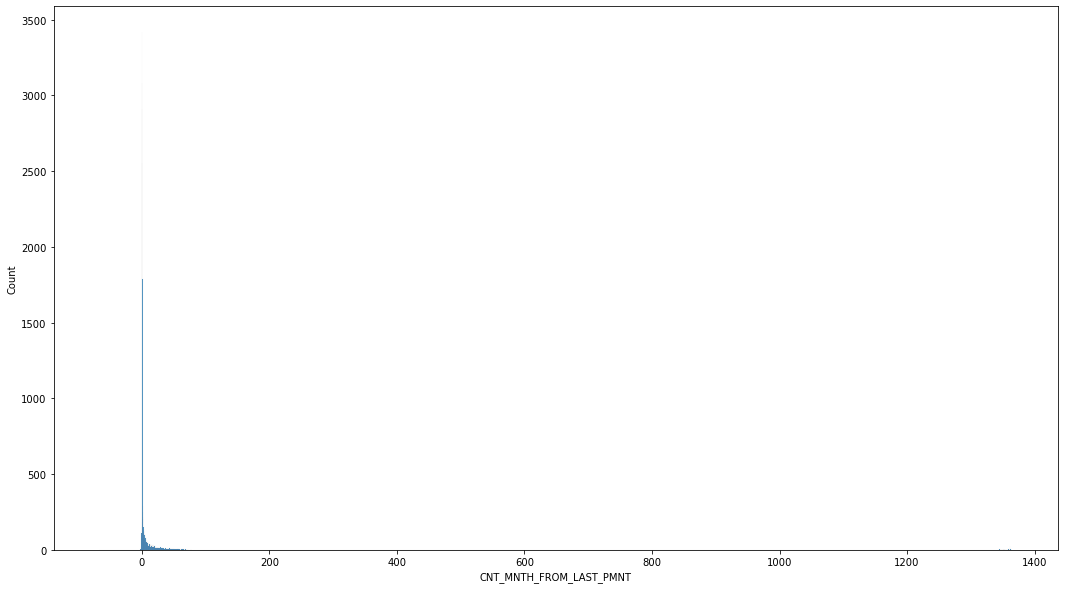

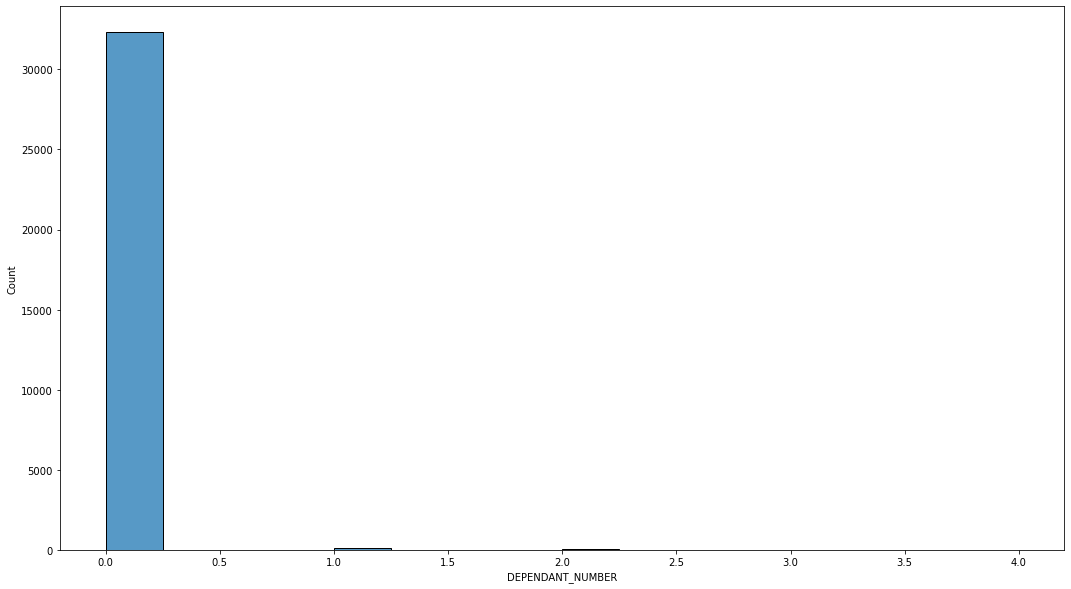

In [673]:
build_histplot(accept_df, numerical + ['CNT_MNTH_FROM_LAST_PMNT', 'DEPENDANT_NUMBER'])

In [674]:
accept_df[accept_df['income'] > 1000000]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport
1647,0,OTHER,elementary,VIP,1784679.0,0.0,1,0.0,NaN,30.554285,3.006340,0.0,0.0,10.052916
4393,0,OTHER,elementary,VIP,1260432.0,0.0,1,1.0,0.851165,42.285762,0.497268,2.0,2.0,9.850146
4394,0,OTHER,elementary,VIP,1260432.0,0.0,1,1.0,0.851165,42.285762,0.497268,2.0,2.0,9.850146
7925,0,2NDFL,elementary,NaN,11450378.0,0.0,0,NaN,NaN,39.583562,1.408219,NaN,NaN,7.947945
8043,0,2NDFL,elementary,NaN,2000095.0,0.0,0,1.0,0.500627,27.397260,2.594521,0.0,0.0,7.139726
9250,0,OTHER,elementary,VIP,1371146.0,0.0,1,1.0,0.307975,39.653005,2.736807,0.0,0.0,0.186122
10187,0,2NDFL,elementary,VIP,1572016.0,0.0,0,1.0,0.991465,41.713100,10.556935,0.0,0.0,8.811730
12511,0,2NDFL,elementary,VIP,1543704.0,0.0,0,0.0,0.379772,33.856030,1.302605,0.0,0.0,10.025893
21604,0,OTHER,elementary,NaN,1160000.0,0.0,0,0.0,1.951165,52.079452,4.161644,1.0,1.0,6.868493
24492,0,OTHER,elementary,VIP,8000000.0,0.0,0,NaN,NaN,51.884932,8.416274,NaN,NaN,6.852055


Максимум 11 600 000 рублей, такое вполне возможно, но лучше удалим так как сильно будет мешаться нашей модели

In [675]:
accept_df.loc[accept_df['income'] > 1000000, 'income'] = np.nan

In [676]:
accept_df[accept_df['experience'] > 45]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport
6074,0,OTHER,beginner,Corporate,173000.0,0.0,0,NaN,NaN,34.536986,101.192365,NaN,NaN,9.750685
22062,0,OTHER,advanced,NaN,18000.0,0.0,0,1.0,1.0,26.302216,100.355191,0.0,0.0,6.261120


Видим, что у двух людей. опыт превышает их возраст, скорее всего ребята доабвили лишний ноль. уберем этот нолик

Теперь посмотрим на переменную CNT_MNTH_FROM_LAST_PMNT

У нас максимальный возраст 60 лет. А люди в среднем могут взять кредит с 20 лет, поэтому все что больше 40 лет, а это 480 месяцев вряд ли возможно. Глянем на эти данные

In [677]:
accept_df[accept_df['CNT_MNTH_FROM_LAST_PMNT'] > 480]

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,income,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,CNT_MNTH_FROM_LAST_PMNT,age,experience,inquiry_14_day,inquiry_21_day,count_mnth_act_passport
6,0,OTHER,elementary,Corporate,39713.0,0.0,1,0.0,1362.504682,25.326611,0.848469,1.0,1.0,5.214589
258,0,OTHER,advanced,Corporate,44607.0,0.0,1,0.0,1362.508132,34.813699,0.495890,1.0,1.0,6.021918
858,0,OTHER,elementary,NaN,31900.0,0.0,0,0.0,1355.633468,38.441178,2.882274,0.0,1.0,9.893233
963,0,OTHER,elementary,Corporate,20000.0,0.0,1,0.0,1352.151994,25.946081,0.595628,NaN,NaN,4.869369
1009,0,OTHER,elementary,Corporate,73950.0,0.0,1,0.0,1364.856564,26.345205,0.342466,1.0,1.0,6.254795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31605,0,OTHER,elementary,Corporate,49186.0,0.0,1,0.0,1348.496393,28.779796,1.040070,NaN,NaN,5.297605
31737,0,OTHER,advanced,Corporate,18339.0,0.0,1,0.0,1346.434162,48.783008,3.286885,0.0,0.0,3.699454
31837,0,2NDFL,advanced,NaN,11048.0,0.0,0,0.0,1348.856631,37.642728,1.081084,4.0,5.0,9.935878
31880,1,2NDFL,elementary,NaN,47601.0,0.0,0,0.0,1345.149686,41.010689,7.896175,3.0,5.0,2.238087


Смею предположть, что все эти люди никогда не брали кредит, поэтому как-то не совсем понятно что делать. Это сильно будет мешать нашей модели обучаться. Вообще я бы использовал отдельную модеь для таких людей, впрочем для людей, которые только взяли кредит сделал бы также

In [678]:
accept_df.loc[accept_df['CNT_MNTH_FROM_LAST_PMNT'] < 0, 'CNT_MNTH_FROM_LAST_PMNT'] = 0

Возможно отрицательные значения эти люди, которым одобрили кредити в других банках, либо бред и стоит удалить

Необходимо рассчитать для всех категориальных переменных следующее:

Теперь нужно посчитать IV.
А для этого заполним пропуски. Для числовых возьмем среднее, а для категориальных моду

In [679]:
def fillna_(df : pd.DataFrame, categorical : set, numerical : set) -> pd.DataFrame:
    df_copy = df.copy()
    for feature in (categorical | numerical):
        value = df[feature].mean() if feature in numerical else df[feature].mode()[0]
        df_copy[feature].fillna(value, inplace=True)            
    return df_copy

In [680]:
accept = fillna_(accept_df, set(categorical), set(numerical))

Проверим остались пропуски у нас в df

In [681]:
accept.isna().sum()    

target                       0
INCOME_TYPE                  0
EDUCATION_                   0
CUSTOMER_CATEGORY_           0
income                       0
DEPENDANT_NUMBER             0
IS_EMPL                      0
COUNT_ACTIVE_CREDIT_NO_CC    0
CNT_MNTH_FROM_LAST_PMNT      0
age                          0
experience                   0
inquiry_14_day               0
inquiry_21_day               0
count_mnth_act_passport      0
dtype: int64

Бинаризуем наши признаки, что посчитать IV

In [682]:
def binirize(df, features, nbins=10):
    df_copy = df.copy()
    for feature in features:
        df_copy[feature + '_bins'] = pd.qcut(df[feature], nbins, duplicates='drop')
    df_copy.drop(columns=features, inplace=True)
    return df_copy


In [683]:
accept_binirize = binirize(accept, ['age', 'income', 'experience', 'count_mnth_act_passport', 'CNT_MNTH_FROM_LAST_PMNT'])

In [684]:
accept_binirize

,target,INCOME_TYPE,EDUCATION_,CUSTOMER_CATEGORY_,DEPENDANT_NUMBER,IS_EMPL,COUNT_ACTIVE_CREDIT_NO_CC,inquiry_14_day,inquiry_21_day,age_bins,income_bins,experience_bins,count_mnth_act_passport_bins,CNT_MNTH_FROM_LAST_PMNT_bins
0,0,OTHER,elementary,Corporate,0.0,0,0.000000,0.360427,0.427094,"(37.504, 40.61]","(118867.9, 1000000.0]","(3.236, 4.407]","(9.577, 10.252]","(19.073, 1365.277]"
1,0,OTHER,elementary,Corporate,0.0,1,1.000000,1.000000,1.000000,"(26.819, 28.673]","(118867.9, 1000000.0]","(1.545, 2.294]","(7.743, 8.8]","(1.084, 2.597]"
2,0,OTHER,elementary,VIP,0.0,1,0.000000,0.000000,0.000000,"(34.761, 37.504]","(118867.9, 1000000.0]","(0.531, 0.948]","(6.6, 7.743]","(19.073, 1365.277]"
3,0,OTHER,elementary,Corporate,0.0,1,2.000000,0.000000,0.000000,"(49.108, 58.899]","(80000.0, 118867.9]","(0.948, 1.545]","(8.8, 9.577]","(1.084, 2.597]"
4,0,OTHER,elementary,Corporate,0.0,1,0.000000,1.000000,1.000000,"(40.61, 44.418]","(118867.9, 1000000.0]","(-4.601, 0.531]","(2.025, 4.118]","(1.084, 2.597]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,1,OTHER,elementary,Corporate,0.0,0,0.670645,0.360427,0.427094,"(49.108, 58.899]","(60550.407, 80000.0]","(-4.601, 0.531]","(6.6, 7.743]","(13.943, 19.073]"
32550,1,OTHER,advanced,Corporate,0.0,0,0.670645,0.360427,0.427094,"(28.673, 30.433]","(35185.0, 42430.5]","(4.407, 5.651]","(6.6, 7.743]","(13.943, 19.073]"
32551,1,2NDFL,elementary,Corporate,0.0,0,0.000000,1.000000,2.000000,"(25.0, 26.819]","(42430.5, 50011.0]","(3.236, 4.407]","(5.498, 6.6]","(13.943, 19.073]"
32552,1,2NDFL,advanced,Corporate,0.0,0,0.000000,1.000000,1.000000,"(26.819, 28.673]","(19293.3, 25000.0]","(2.294, 3.236]","(5.498, 6.6]","(13.943, 19.073]"


In [685]:
# Делаю все как на слайде из семинара
def calculate_WOE_IV(df, feature):
    df_copy = df.copy()
    df_copy.target = 1 - df.target
    tmp = pd.DataFrame()
    tmp['кол-во всех объектов'] = df_copy.groupby(by=[feature]).count()['target']
    tmp['кол-во "1"'] = df_copy.groupby(by=[feature]).sum()['target']
    tmp['f(x|y=1)'] = tmp['кол-во "1"'] / np.sum(tmp['кол-во "1"'])
    tmp['кол-во "0"'] = tmp['кол-во всех объектов'] - tmp['кол-во "1"']
    tmp['f(x|y=0)'] = tmp['кол-во "0"'] / np.sum(tmp['кол-во "0"'])
    tmp['WoE'] = np.log(tmp['f(x|y=1)'] / tmp['f(x|y=0)'])
    tmp.replace({np.inf : 0, -np.inf : 0}, inplace=True)
    tmp_IV = np.sum((tmp['f(x|y=1)'] - tmp['f(x|y=0)']) * tmp['WoE'])
    return tmp, tmp['WoE'].to_dict(), tmp_IV

Считаю IV для каждого признака на выборке accept

In [686]:
IVs_accept = []
for feature in accept_binirize.drop(columns='target').columns:
    _, __, IV = calculate_WOE_IV(accept_binirize, feature)
    IVs_accept.append((feature, IV))
print(tabulate(IVs_accept, tablefmt='grid'))

+------------------------------+------------+
| INCOME_TYPE                  | 0.0100185  |
+------------------------------+------------+
| EDUCATION_                   | 0.0548425  |
+------------------------------+------------+
| CUSTOMER_CATEGORY_           | 0.00542652 |
+------------------------------+------------+
| DEPENDANT_NUMBER             | 0.00162548 |
+------------------------------+------------+
| IS_EMPL                      | 0.784122   |
+------------------------------+------------+
| COUNT_ACTIVE_CREDIT_NO_CC    | 0.115      |
+------------------------------+------------+
| inquiry_14_day               | 0.15587    |
+------------------------------+------------+
| inquiry_21_day               | 0.19572    |
+------------------------------+------------+
| age_bins                     | 0.0242366  |
+------------------------------+------------+
| income_bins                  | 0.0669036  |
+------------------------------+------------+
| experience_bins              | 0

Строим логистическую модель только на одобренных заявках

In [687]:
X_accept = accept_binirize.drop(columns=['target'])
y_accept = accept_binirize.target

In [688]:
from sklearn.model_selection import train_test_split

Поделим выборку на три части: train, test, valid. На трейне учимся, на тесте проверяем, на валидационной считаем WoE.

In [689]:
X_train_accept, X_test_accept, y_train_accept, y_test_accept = train_test_split(
    X_accept, y_accept, stratify=y_accept, test_size=0.15)

In [690]:
X_train_accept, X_woe_accept, y_train_accept, y_woe_accept = train_test_split(
    X_train_accept, y_train_accept, stratify=y_train_accept, test_size=0.35)

In [691]:
def add_WoE(df, df_valid, features):
    df_copy = df.copy()
    for feature in features:
        __, d_WoE, _ = calculate_WOE_IV(df_valid, feature)
        df_copy[feature].replace(d_WoE, inplace=True)
    return df_copy

In [692]:
X_woe_accept['target'] = y_woe_accept
X_train_transform_accept = add_WoE(X_train_accept, X_woe_accept, X_train_accept.columns)
X_test_transform_accept = add_WoE(X_test_accept, X_woe_accept, X_test_accept.columns)

In [693]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(X_train_transform_accept, y_train_accept)

LogisticRegression()

In [694]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
y_pred_accept = 1 - (clf.predict_proba(X_test_transform_accept) > 0.947)[:, 0]
print("AUC-ROC на тествой выборке =",      
      round(roc_auc_score(y_test_accept, y_pred_accept), 2))
print("GINI на тестовой выборке =", 
      round(2 * roc_auc_score(y_test_accept, y_pred_accept) - 1, 2))
print("F1-Score на тестовой выборке", 
      round(f1_score(y_test_accept, y_pred_accept), 2))

AUC-ROC на тествой выборке = 0.61
GINI на тестовой выборке = 0.22
F1-Score на тестовой выборке 0.12


Теперь преобразуем reject заявки

In [695]:
def add_WoE(df, df_valid, features):
    df_copy = df.copy()
    for feature in features:
        tmp, d_WoE, _ = calculate_WOE_IV(df_valid, feature)
        df_copy[feature].replace(d_WoE, inplace=True)
    return df_copy

In [696]:
reject = fillna_(reject_df, set(categorical), set(numerical))

In [697]:
#### В общем ТУТ СУПЕР КОСТЫЛЬ. ПРОСТИТЕ, но без него никак!

def add_WoEEE(df, df_valid, features, except_features):
    df_copy = df.copy()
    ### Работаю с категориальными признаками
    for feature in features:
        tmp, d_WoE, _ = calculate_WOE_IV(df_valid, feature)
        df_copy[feature].replace(d_WoE, inplace=True)
    for feature in except_features:
        tmp, d_WoE, _ = calculate_WOE_IV(df_valid, feature)
        if feature == 'age_bins':
            df_copy['age'] = tmp.iloc[0]['WoE']
        elif feature == 'income_bins':
            for index, row in df['income'].iteritems():
                for kostil in tmp.index:
                    if row in kostil:
                        df_copy.iloc[index, 3] = tmp.loc[kostil, 'WoE']
                        break
        elif feature == 'experience_bins':
            for index, row in df['experience'].iteritems():
                for kostil in tmp.index:
                    if row in kostil:
                        df_copy.iloc[index, 9] = tmp.loc[kostil, 'WoE']
                        break
        elif feature == 'count_mnth_act_passport_bins':
            for index, row in df['count_mnth_act_passport'].iteritems():
                for kostil in tmp.index:
                    if row in kostil:
                        df_copy.iloc[index, 12] = tmp.loc[kostil, 'WoE']
                        break
        elif feature == 'CNT_MNTH_FROM_LAST_PMNT_bins':
            for index, row in df['CNT_MNTH_FROM_LAST_PMNT'].iteritems():
                for kostil in tmp.index:
                    if row in kostil:
                        df_copy.iloc[index, 12] = tmp.loc[kostil, 'WoE']
                        break
    return df_copy

Функция, которая выше помогает и преобразовывает reject выборку, чтобы на ней можно сделать предсказание

In [698]:
reject_binirize = add_WoEEE(reject, accept_binirize, 
                             categorical + ['COUNT_ACTIVE_CREDIT_NO_CC', 'inquiry_14_day', 'inquiry_21_day'],
                             ['age_bins', 'income_bins', 'experience_bins', 'CNT_MNTH_FROM_LAST_PMNT_bins'])

Меняем название столбцов, чтобы потом красиво склеить два датафрейма

In [699]:
reject_binirize['age_bins'] = reject_binirize['age']
reject_binirize['income_bins'] = reject_binirize['income']
reject_binirize['experience_bins'] = reject_binirize['experience']
reject_binirize['count_mnth_act_passport_bins'] = reject_binirize['count_mnth_act_passport']
reject_binirize['CNT_MNTH_FROM_LAST_PMNT_bins'] = reject_binirize['CNT_MNTH_FROM_LAST_PMNT']
reject_binirize = reject_binirize.drop(columns=['age', 'income', 'experience',
                                                'count_mnth_act_passport', 'CNT_MNTH_FROM_LAST_PMNT'])

Делаем предсказание

In [700]:
y_pred_reject = 1 - (clf.predict_proba(reject_binirize) > 0.99)[:, 0]

In [701]:
print("Доля отказанных заявок", y_pred_reject.mean())

Доля отказанных заявок 0.14149443561208266


Дальше будет много склеик с таргетом и accept выборкой, чтобы ничего не потерялось

In [702]:
reject_binirize = pd.concat([pd.Series(y_pred_reject, name='target'), reject_binirize], axis=1)

In [703]:
train_mix = pd.concat([pd.concat([y_train_accept, X_train_transform_accept], axis=1), 
                       reject_binirize], ignore_index=True)

Пересчитываем  IV для train_mix

In [704]:
IVs_mix = []
for feature in accept_binirize.drop(columns='target').columns:
    _, __, IV = calculate_WOE_IV(train_mix, feature)
    IVs_mix.append((feature, IV / 10))
print(tabulate(IVs_mix, tablefmt='grid'))

+------------------------------+-----------+
| INCOME_TYPE                  | 0.109169  |
+------------------------------+-----------+
| EDUCATION_                   | 0.0949119 |
+------------------------------+-----------+
| CUSTOMER_CATEGORY_           | 0.092516  |
+------------------------------+-----------+
| DEPENDANT_NUMBER             | 0.0916203 |
+------------------------------+-----------+
| IS_EMPL                      | 0.350127  |
+------------------------------+-----------+
| COUNT_ACTIVE_CREDIT_NO_CC    | 0.172711  |
+------------------------------+-----------+
| inquiry_14_day               | 0.208962  |
+------------------------------+-----------+
| inquiry_21_day               | 0.209078  |
+------------------------------+-----------+
| age_bins                     | 0.0935878 |
+------------------------------+-----------+
| income_bins                  | 0.100868  |
+------------------------------+-----------+
| experience_bins              | 0.10228   |
+---------

Обучаем, предсказываем, считаем GINI, F1 для accept+reject

In [705]:
clf.fit(train_mix.drop(columns=['target']), train_mix.target)

LogisticRegression()

In [706]:
y_pred_mix = 1 - (clf.predict_proba(X_test_transform_accept)[:, 0] > 0.97)

In [707]:
print("AUC-ROC на тествой выборке =",      
      round(roc_auc_score(y_test_accept, y_pred_mix), 2))
print("GINI на тестовой выборке =", 
      round(2 * roc_auc_score(y_test_accept, y_pred_mix) - 1, 2))
print("F1-Score на тестовой выборке", 
      round(f1_score(y_test_accept, y_pred_mix), 2))

AUC-ROC на тествой выборке = 0.63
GINI на тестовой выборке = 0.26
F1-Score на тестовой выборке 0.07
